# Chapter-6: Advanced Machine learning

**How Machine learn?**
  - In supervised learning, the algorithm learns using a function called loss function, cost function or error function, which is a function of predicted output and the desired output. 
  - If $h(X_i)$ is the predicted output and $y_i$ is the desired output, then the Loss function is defined as
    $$L = \frac{1}{n}\sum_{i=1}^n [y_i-h(X_i)]^2$$
    where $n$ is the total number of records for which the predictions are made. The function defined above is also known as sum of squared error (SSE). SSE is the loss function for a regression model. 
  - The objective is to learn the values of parameters (aka feature weights) that minimize the cost function. Machine learning uses optimization algorithms which can be used for minimizing the loss function. Most widely used optimization technique is called the Gradient Descent.
**Gradient decent algorithm:**
  - Descent is an iterative optimization algorithm used to find the minimum of a function. It's commonly used in machine learning for training models, particularly in the context of linear regression, logistic regression, and neural networks. 
  - The cost function for the linear regression model is: 
    $$\text{MSE} = \frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2$$
    where the predicted values of $y_i$ i.e. $h_i$ is represented as $\hat{y}_i = \hat{\beta}_0 + \hat{\beta}_1 X_i$
  - The error is a function of $\beta_0$ and $\beta_1$.

  

  <figure style="text-align: center;">
    <img src="cost-fun.png" alt="Cost function" width="90%">
    <figcaption><strong>Cost function</strong></figcaption>
</figure>

  It is a pure convex function and has a global minimum as shown above. The gradient decent algoritm starts at a random starting value (for $\beta_0$ and $\beta_1$) and moves towards the optimal solution.

  Following steps are used to find the optimal values of the two coefficients that minimize the loss functions:
  1. Randomly guess the intiial values of $\beta_0$ (bias or intercept) and $\beta_1$ (feature weight). 
  2. Calculate the estimated value of the outcome variable ($\hat{y}_i$) for the initialized values of bias and weights. 
  3. Calculate the mean square error function (MSE).
  4. Adjust the $\beta_0$ and $\beta_1$ values by calculating the gradients of the error function.
  
  $$\beta_0 = \beta_0 - \alpha \times \frac{\partial \text{MSE}}{\partial \beta_0}$$
  
  and 
  
  $$\beta_1 = \beta_1 - \alpha \times \frac{\partial \text{MSE}}{\partial \beta_1}$$

  where $\alpha$ is the learning rate (a hyperparameter). The value of this parameter is chosen based on the magnitude of update needed to be applied to the bias and weight at each iteration.
   
  5. Repeat steps 1 to 4 for several iterations until the error stops reducing further or the change in
cost is infinitesimally small.

- **Loading important libraries:**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [ ]:
import warnings
warnings.filterwarnings('ignore')

- **Loading the dataset:**
  The dataset contains the examples of advertisement spends across multiple channels such as Radio, TV, and Newspaper, and the corresponding sales revenue generated at different time periods. The dataset is taken from a chapter in the book titled “Introduction to Statistical Learning” by James et al. (2013). The dataset has the following elements:
  1. TV – Spend on TV advertisements
  2. Radio – Spend on radio advertisements
  3. Newspaper – Spend on newspaper advertisements
  4. Sales – Sales revenue generated

In [ ]:
sales_df =pd.read_csv('Advertising.csv')
sales_df.head()

In [ ]:
sales_df = sales_df.drop(columns=['Unnamed: 0'], axis=1)
sales_df.head()

- **Set X and Y Variables**

In [ ]:
X = sales_df.iloc[:, :-1]
y = sales_df.iloc[:, -1]

In [ ]:
X.head()

In [ ]:
y.head()

- **Standardize X and y**
  here we have used following formula:

  $$ X_{\text{normalized}} = \frac{X - \bar{X}}{\sigma_X}$$

  and 

  $$ y_{\text{normalized}} = \frac{y - \bar{y}}{\sigma_y}$$

  where 
  - X are the feature data points
  - y depedent variable data points
  - All variables with bar represnts the mean value and $\sigma$ represent the standard deviation.

In [ ]:
y = np.array((y-y.mean())/y.std())
X = X.apply(lambda x: (x - x.mean())/x.std(), axis = 0)

In [ ]:
X.head()

- **Implementing the Gradient Descent Algorithm** 
  Here we will now implement the gradient decent method to find the coefficients. This is done through the optimization of cost function for the model. This is done in following methods:
  1. **Method 1** Method to randomly initialize the bias and weights.
  2. **Method 2** Method to calculate the predicted value of $\hat{y}$, that is, $\hat{y}$ given the bias and weights.
  3. **Method 3** Method to calculate the cost function from predicted and actual values of $\hat{y}$.
  4. **Method 4** Method to calculate the gradients and adjust the bias and weights.

**Method-1** Random Initialization of the Bias and Weights

The method randomly initializes the bias and weights. It takes the number of weights that need to be
initialized as a parameter.

In [ ]:
import random

# dim - is the number of weights to be initialized besides the bias
def initialize(dim):
    # For reproducible results, the seed it set to 42.
    np.random.seed(seed=42)
    random.seed(42)
    
    # Initialize the bias.
    b = random.random()
    
    # Initialize the weights.
    w = np.random.rand(dim)
    
    return b, w

Simce we have three input variables: 'TV', 'Radio', 'Newspaper', we can invoke the initialize() method as follows:

In [ ]:
b, w = initialize( 3 )
print( "Bias:", b, "Weights: ", w )

**Method 2:** Predict Y Values from the Bias and Weights

Calculate the Y values for all the inputs, given the bias and weights. We will use matrix ultiplication of weights with input variable values. matmul() method in numpy library can be used for matrix multiplication. Each row of X can be multiplied with the weights column to produce the predicted outcome variable.

predicted y = $\beta_0 + X \times \beta_1$

In [ ]:
# Inputs:
# b - bias
# w - weights
# X - the input matrix

def predict_Y( b, w, X ):
    return b + np.matmul( X, w )

In [ ]:
b, w = initialize( 3 )
y_hat = predict_Y( b, w, X)
y_hat[0:10]

**Method 3:** Calculate the Cost Function — MSE

Compute mean squared error (MSE) by
1. Calculating differences between the estimated $\hat{y}$ and actual y.
2. Calculating the square of the above residuals, and sum over all records.
3. Dividing it with the number of observations.

In [ ]:
import math

# Inputs
# y - Actual values of y
# y_hat - predicted value of y

def get_cost( y, y_hat ):
    # Calculating the residuals - difference between actual and predicted values
    y_resid = y - y_hat
    # Matrix multiplication with self will give the square values
    # Then take the sum and divide by number of examples to
    # calculate mean
    return np.sum( np.matmul( y_resid.T, y_resid ) ) / len( y_resid)

Invoking `get_cost()` after initializing the bias and weights and calculating predicted values for outcome variable.

In [ ]:
b, w = initialize(3)
y_hat =  predict_Y(b,w,X)
get_cost(y, y_hat) # cost function value

**Method 4:** Update the Bias and Weights

The bias and weights will be updated in a method update_beta() using:

$$\beta_0 = \beta_0 - \alpha \times \frac{\partial \text{MSE}}{\partial \beta_0}$$
  
  and 
  
  $$\beta_1 = \beta_1 - \alpha \times \frac{\partial \text{MSE}}{\partial \beta_1}$$

  The parameters passed to the function are:
  1. X,y: the input and output variables.
  2. $\hat{y}$: predicted value with current bias and weights.
  3. $b_0$, $w_0$: current bias and weights
  4. learning rate: learning rate to adjust the update step.
  
  Here 

  $\frac{\partial \text{MSE}}{\partial \beta_0} = -\frac{2}{n}\sum_{i=1}^n (y_i - \hat{y}_i)$
  
  $\frac{\partial \text{MSE}}{\partial \beta_1} = -\frac{2}{n}\sum_{i=1}^n (y_i - \hat{y}_i)\times X_i$

In [ ]:
def update_beta( x, y, y_hat, b_0, w_0, learning_rate ):
    # gradient wrt to bias
    db = (np.sum( y_hat - y ) * 2) / len(y)
    #gradient wrt to weights
    dw = (np.dot( ( y_hat - y ), x ) * 2 ) / len(y)
    #update bias
    b_1 = b_0 - learning_rate * db
    #update beta
    w_1 = w_0 - learning_rate * dw
    #return the new bias and beta values
    return b_1, w_1

for $\alpha = 0.01$:

In [ ]:
b,w = initialize(3)
print(f"After initialization - Bias: {b}, and weights: {w}")

y_hat = predict_Y(b,w,X)
b,w = update_beta(X, y,y_hat, b,w, 0.01)
print(f"After first update -Bias: {b}, and weights: {w}")

The updates to the bias and weights need to be done iteratively, until the cost is minimum. It can take
several iterations and is time-consuming. There are two approaches to stop the iterations:
1. Run a fixed number of iterations and use the bias and weights as optimal values at the end these
iterations.
2. Run iterations until the change in cost is small, that is, less than a predefined value (e.g., 0.001).

We will define a method `run_gradient_descent()`, which takes `alpha` and `num_iterations` as parameters
and invokes methods like `initialize()`, `predict_Y()`, `get_cost()`, and `update_beta()`.

In [ ]:
import pandas as pd

def run_gradient_descent(X, y, alpha=0.01, num_iterations=100):
    # Initialize the bias and weights
    b, w = initialize(X.shape[1])

    iter_num = 0
    
    # gd_iterations_df keeps track of the cost every 10 iterations
    gd_iterations_df = pd.DataFrame(columns=['iteration', 'cost'], dtype=float)  # Specify dtype for columns
    
    result_idx = 0
    
    # Run the iterations in loop
    for each_iter in range(num_iterations):
        # Calculate predicted value of y
        y_hat = predict_Y(b, w, X)
        # Calculate the cost
        this_cost = get_cost(y, y_hat)  
        # Save the previous bias and weights
        prev_b = b
        prev_w = w
        # Update and calculate the new values of bias and weights
        b, w = update_beta(X, y, y_hat, prev_b, prev_w, alpha)  
        # For every 10 iterations, store the cost i.e. MSE
        if iter_num % 10 == 0:
            gd_iterations_df.loc[result_idx] = [iter_num, this_cost]
            result_idx += 1
        iter_num += 1
    print("Final estimate of b and w:", b, w)
    # return the final bias, weights, and the cost at the end
    return gd_iterations_df, b, w

- variable `gd_iterations_df` keeps track of the cost every 10 iterations.
- default value of 0.01 for the learning parameter and 100 for number of iterations will be used.

In [ ]:
X.shape[1]

In [ ]:
gd_iterations_df, b, w = run_gradient_descent( X, y, alpha = 0.001, num_iterations = 200 )

In [ ]:
gd_iterations_df

In [ ]:
plt.plot(gd_iterations_df['iteration'], gd_iterations_df['cost'])
plt.xlabel('Iteration')
plt.ylabel('Cost (MSE)')
plt.title('Gradient Descent Cost vs. Iteration')
plt.show()

In [ ]:
alpha_df_1, b, w =run_gradient_descent(X, y, alpha =0.01, num_iterations=2000)

In [ ]:
alpha_df_2, b, w =run_gradient_descent(X, y, alpha =0.001, num_iterations=2000)

In [ ]:
plt.plot(alpha_df_1['iteration'],alpha_df_1['cost'], label= "alpha = 0.01")
plt.plot(alpha_df_2['iteration'],alpha_df_2['cost'], label= "alpha = 0.001")
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.legend()
plt.show()

The plot shows that the learning is faster for alpha value 0.01 compared to 0.001. For smaller
values, the learning could be slower whereas higher learning rate could lead to skipping the minima of
cost function. It is imperative to search for the optimal learning parameter.

### **SCIKIT-LEARN LIBRARY FOR MACHINE LEARNING**

Scikit-learn provides a comprehensive set of algorithms for the following kind of problems:
1. Regression
2. Classification
3. Clustering

#### Steps for Building Machine Learning Models

The steps to be followed for building, validating a machine learning model and measuring its accuracy
are as follows:
1. Identify the features and outcome variable in the dataset.
2. Split the dataset into training and test sets.
3. Build the model using training set.
4. Predict outcome variable using a test set.
5. Compare the predicted and actual values of the outcome variable in the test set and measure
accuracy using measures such as mean absolute percentage error (MAPE) or root mean square
error (RMSE).

- **Step-1:** Splitting the dataset into train and test datasets

In [ ]:
sales_df.head()

In [ ]:
X = sales_df[['TV', 'Radio', 'Newspaper']]
y = sales_df.Sales

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state = 42)

Here dataset is split into train and test in 70:30 ratio. 

In [ ]:
sales_df.shape

In [ ]:
print(f'Length of the taining dataset: {len(X_train)}')
print(f'Length of the test dataset: {len(X_test)}')

- **Building Linear Regression Model with Train Dataset**
  Linear models are included in `sklearn.linear_model` module. We will use `LinearRegression` method for
building the model and compare with the results we obtained through our own implementation of gradient
descent algorithm.
  - Intializeing the model
  - Invoke `fit()` method on the model and pass the input (X) and output (y) values.
  - `fit()` will run the algorithm and return the final estimated model parameters.

In [ ]:
from sklearn.linear_model import LinearRegression
# Initializing the model
linreg = LinearRegression()
# Fitting training data to the model
linreg.fit( X_train, y_train )

- Intercept (bias) = `linreg.intercept_`
- Coefficients (weights) = `linreg.coef_`

In [ ]:
print(f'The intercept is {linreg.intercept_}')
print(f'The weights are {linreg.coef_}')

In [ ]:
list(zip( ['TV', 'Radio', 'Newspaper'], list( linreg.coef_ ) ) )

Therefore the estimated model is:

`Sales = 2.7089 + 0.0441 x TV + 0.1993 x Radio + 0.0069 x Newspaper`

The model indicates that for every unit change in TV spending, there is an increase of 0.044 units in sales revenue.

- **Making Prediction on Test Set**
  sklearn provides `predict()` method for all ML models, which takes the `X` values and predicts the outcome variable `y` as shown in the following code:

In [ ]:
#Predicting the y value from the test set
y_pred = linreg.predict( X_test )

To compare the actual and predicted values of the outcome variable and the residuals, we will create and
store these values in a DataFrame. The residual here refers to the difference between the actual and the
predicted values.

In [ ]:
# Creating DataFrame with 3 columns named: actual, predicted and residuals to store the respective values
test_pred_df = pd.DataFrame( { 'actual': y_test, 
                              'predicted': np.round( y_pred, 2 ), #rounding each element in that array to two decimal places.
                              'residuals': y_test - y_pred } )

In [ ]:
# Randomly showing the 10 observations from the DataFrame
test_pred_df.sample(10)

**Scatter Plot: Actual vs. Predicted:** This plot helps you visualize how well your model's predictions align with the actual values. Ideally, points should fall along a diagonal line.

In [ ]:
plt.scatter(test_pred_df['actual'], test_pred_df['predicted'], c=test_pred_df['residuals'], cmap='viridis')
plt.colorbar(label='Residuals')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot: Actual vs. Predicted with Residuals Color Map')
plt.show()

**Residuals Distribution Plot:** This plot shows the distribution of residuals.

In [ ]:
sns.histplot(test_pred_df['residuals'], kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()

**Residuals vs. Predicted Values Plot:** This plot helps you identify patterns or trends in residuals concerning predicted values. A random spread around the zero line is desirable.

In [ ]:
plt.scatter(test_pred_df['actual'], test_pred_df['residuals'], color='b', label= 'Actual data points')
plt.scatter(test_pred_df['predicted'], test_pred_df['residuals'], color='r', label= 'Predicted data points')
plt.axhline(y=0, color='r', linestyle='--', label='Zero Residuals Line')
plt.xlabel('Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Actual Values')
plt.legend()
plt.show()


**Outliers:**

In [ ]:
sns.boxplot(x=test_pred_df['residuals'])
plt.xlabel('Residuals')
plt.title('Box Plot of Residuals')
plt.show()

This box plot helps you identify the presence of outliers in the distribution of residuals. Outliers are represented as points beyond the "whiskers" of the box plot

In [ ]:
sns.violinplot(x=test_pred_df['residuals'])
plt.xlabel('Residuals')
plt.title('Violin Plot of Residuals')
plt.show()

A violin plot combines aspects of a box plot and a kernel density plot. It provides a richer view of the distribution, including the shape and density of the residuals.

### Measuring Accuracy 
Root Mean Square Error (RMSE) and R-squared are two key accuracy measures for Linear Regression
Models. `sklearn.metrics` package provides methods to measure various metrics. For regression models,
`mean_squared_error` and `r2_score` can be used to calculate MSE and R-squared values, respectively.

1. **Calculating the R-squared value**
    $R^2 = 1- \frac{SSR}{SST}$

    where
    - SSR = $\sum (y_{\text{pred}} - y)^2$
    - SSt = $\sum (y - y_\text{mean})^2$

In [ ]:
## Importing metrics from sklearn
from sklearn import metrics
# y_train contains the actual value and the predicted value is 
# returned from predict() method after passing the X values of the training data.
r2 = metrics.r2_score( y_test, y_pred )
print('R Squared for the test dataset: ', r2)

The model explains 86% of the variance in y. We can also check with the train dataset:


In [ ]:
r2 = metrics.r2_score( y_train, linreg.predict(X_train) )
print('R Squared for the training dataset: ', r2)

2. **Calculating RMSE** `metrics.mean_squared_error()` takes actual and predicted values and returns MSE: 
   MSE = $ \frac{1}{n} \sum (y - y_\text{pred})^2$

In [ ]:
# y_pred contains predicted value of test data
mse = metrics.mean_squared_error( y_test, y_pred )
# Taking square root of MSE and then round off to two decimal values
rmse = round( np.sqrt(mse), 2 )
print('RMSE: ', rmse)

Therefore on average, the model's predictions deviate from the actual values by approximately 1.95 units

To understand the model error in detail, we need to understand the components of the error term
and how to deal with those components for improving model performance. In the next section, we will
discuss these components in detail.

### Bias-Variance Trade-off 
Model errors can be decomposed into two components: 
   - bias and 
   - variance.
        
   Understanding these two components is key to diagnosing model accuracies and avoiding model overfitting or underfitting. High bias can lead to building underfitting model, whereas high variance can lead to overfitting models.

   TO understand the concept, let's take another example with dataset `curve.csv`.

In [112]:
# Reading the file curve.csv and printing first few examples
curve = pd.read_csv( 'curve.csv' )
curve.head()

,x,y
0,2,-1.999618
1,2,-1.999618
2,8,-3.978312
3,9,-1.969175
4,10,-0.957770


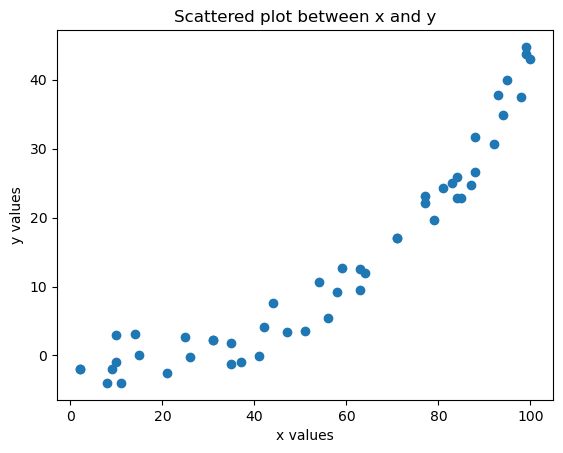

In [113]:
plt.scatter( curve.x, curve.y );
plt.xlabel('x values')
plt.ylabel('y values')
plt.title('Scattered plot between x and y')
plt.show()

It can be observed from this figure that the relation between y and x is not linear and looks like some
polynomial. But we are not sure of the degree of the polynomial form. We need to try various polynomial
forms of x and verify which model fits the data best.

To explore various polynomial forms, `polyfit()` from `numpy` library can be used. `polyfit()` takes X and Y values, and the degree of x features to be used to fit a model. 
- Degree 1 means only value of x is used to predict y, whereas 
- degree 2 means $x_1$ and $x_2$ are used to predict y.

In [128]:
def fit_poly_and_plot(df, n):
    x = df['x']
    y = df['y']
    
    # Fit polynomial
    coefficients = np.polyfit(x, y, n)
    fitted_curve = np.poly1d(coefficients)

    # Scatter plot
    plt.scatter(x, y, label='Scattered Data', color ='b')

    # Fitted curve plot    
    plt.plot(x, fitted_curve(x), color='r', label=f'Fitted Curve (Degree {n})')

    # Add labels and legend
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()

    # Show the plot
    plt.show()

    return fitted_curve

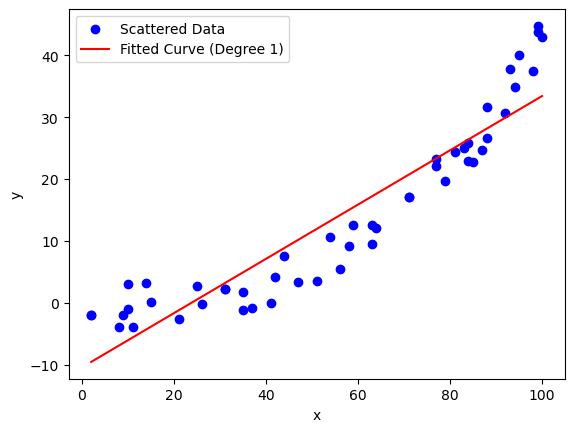

poly1d([  0.43870242, -10.44634844])

In [129]:
fit_poly_and_plot(curve,1)

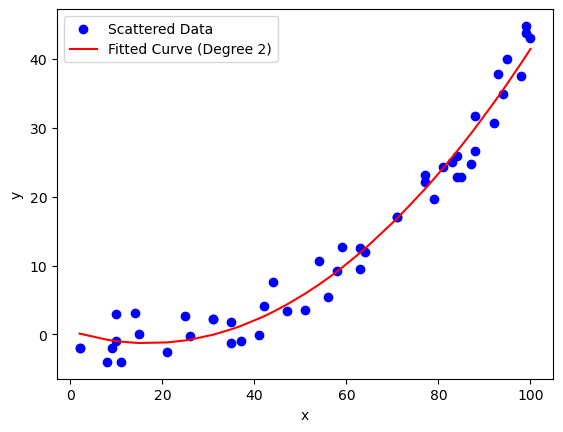

poly1d([ 0.00618721, -0.20989619,  0.5251575 ])

In [132]:
fit_poly_and_plot(curve,2)

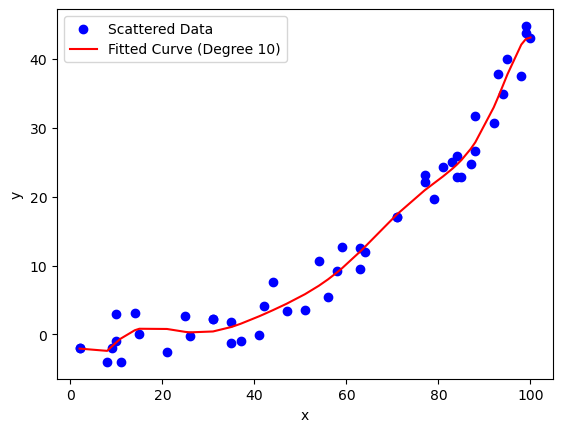

poly1d([-7.40536556e-17, -8.69257043e-14,  4.88818644e-11, -1.00203629e-08,
        1.09151781e-06, -7.01432681e-05,  2.72431220e-03, -6.21340712e-02,
        7.60130930e-01, -3.95063528e+00,  3.26890330e+00])

In [133]:
fit_poly_and_plot(curve,10)

In [137]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

# Function to calculate RMSE for a given degree
def calculate_rmse(df, degree):
    x = df['x']
    y = df['y']
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    # Fit polynomial
    coefficients = np.polyfit(x_train, y_train, degree)
    fitted_curve = np.poly1d(coefficients)

    # Predictions on train and test sets
    y_train_pred = fitted_curve(x_train)
    y_test_pred = fitted_curve(x_test)

    # Calculate RMSE
    rmse_train = sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = sqrt(mean_squared_error(y_test, y_test_pred))

    return rmse_train, rmse_test

# Create a dataframe to store results
result_df = pd.DataFrame(columns=['degree', 'rmse_train', 'rmse_test'])

# Loop through degrees 1 to 15
for degree in range(1, 16):
    rmse_train, rmse_test = calculate_rmse(curve, degree)
    result_df = pd.concat([result_df, pd.DataFrame({'degree': [degree], 'rmse_train': [rmse_train], 'rmse_test': [rmse_test]})], ignore_index=True)

# Print or use the result_df as needed
result_df

,degree,rmse_train,rmse_test
0,1,5.381508,5.800512
1,2,2.402382,3.054582
2,3,2.221174,2.883015
3,4,2.220116,2.912914
4,5,2.171885,2.749130
5,6,2.154547,2.758178
6,7,2.141227,2.699172
7,8,2.140623,2.720162
8,9,2.112392,2.583999
9,10,2.105960,2.629010


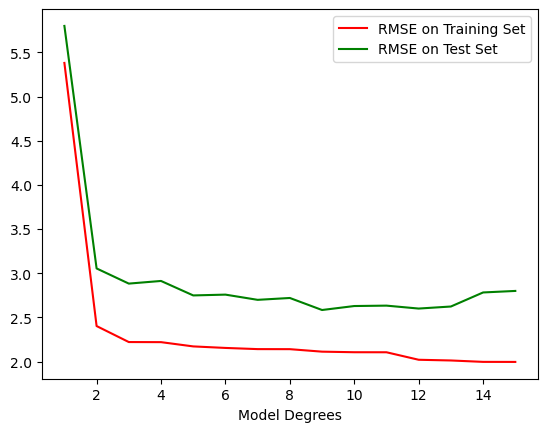

In [141]:
plt.plot(result_df.degree, result_df.rmse_train, label='RMSE on Training Set', color='r')
# Plotting the rmse for test set in green color
plt.plot(result_df.degree, result_df.rmse_test, label='RMSE on Test Set', color='g')
# Mention the legend
plt.legend()
plt.xlabel('Model Degrees')
plt.show()

1. Error on the test set are high for the model with complexity of degree 1 and degree 15.
2. Error on the test set reduces initially, however increases after a specific level of complexity.
3. Error on the training set decreases continuously.

The degree can also be associated with complexity. It can be observed that as complexity (number of
polynomial terms in the model) increases, the model starts to fit to train and test data well. But beyond a specific level of complexity (i.e., complexity level 9), the training error continues to reduce, but the test error starts to increase again. This is a point where the model starts to overfit the training set and stops generalizing. So, the optimal model complexity is 5, which has low bias and low variance.

In [151]:
# above can also be done using:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from math import sqrt

# Function to calculate RMSE for a given degree
def calculate_rmse(df, degree):
    x = df['x'].values.reshape(-1, 1)
    y = df['y']

    # Create polynomial features
    poly = PolynomialFeatures(degree=degree, include_bias = True)
    x_poly = poly.fit_transform(x)

    # Split the data
    x_train, x_test, y_train, y_test = train_test_split(x_poly, y, test_size=0.2, random_state=42)

    # Fit linear regression
    model = LinearRegression()
    model.fit(x_train, y_train)

    # Predictions on train and test sets
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    # Calculate RMSE
    rmse_train = sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = sqrt(mean_squared_error(y_test, y_test_pred))

    return rmse_train, rmse_test

# Print or use the result_df as needed
result_df

,degree,rmse_train,rmse_test
0,1,5.381508,5.800512
1,2,2.402382,3.054582
2,3,2.221174,2.883015
3,4,2.220116,2.912914
4,5,2.171885,2.749130
5,6,2.154547,2.758178
6,7,2.141227,2.699172
7,8,2.140623,2.720162
8,9,2.112392,2.583999
9,10,2.105960,2.629010


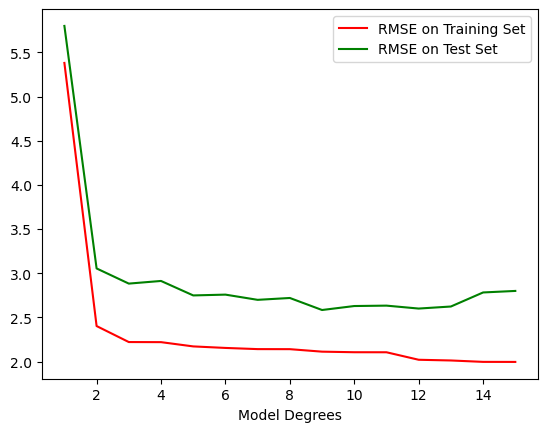

In [152]:
plt.plot(result_df.degree, result_df.rmse_train, label='RMSE on Training Set', color='r')
# Plotting the rmse for test set in green color
plt.plot(result_df.degree, result_df.rmse_test, label='RMSE on Test Set', color='g')
# Mention the legend
plt.legend()
plt.xlabel('Model Degrees')
plt.show()

## K-Fold Cross-Validation
K-fold cross-validation is a robust validation approach that can be adopted to verify if the model is
overfitting. The model, which generalizes well and does not overfit, should not be very sensitive to any
change in underlying training samples. K-fold cross-validation can do this by building and validating
multiple models by resampling multiple training and validation sets from the original dataset.

1. Split the training data set into K subsets of equal size. Each subset will be called a fold. Let the
folds be labelled as $f_1, f_2, … , f_K$. Generally, the value of $K$ is taken to be 5 or 10.
2. For i = 1 to K
    (a) Fold $f_i$ is used as validation set and all the remaining K – 1 folds as training set.
    (b) Train the model using the training set and calculate the accuracy of the model in fold $f_i$.

Calculate the final accuracy by averaging the accuracies in the test data across all K models. The average accuracy value shows how the model will behave in the real world. The variance of these accuracies is an indication of the robustness of the model.

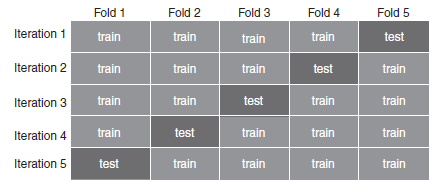

In [153]:
ipl_auction_df = pd.read_csv('IPL-IMB381IPL2013.csv')

In [154]:
ipl_auction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sl.NO.         130 non-null    int64  
 1   PLAYER NAME    130 non-null    object 
 2   AGE            130 non-null    int64  
 3   COUNTRY        130 non-null    object 
 4   TEAM           130 non-null    object 
 5   PLAYING ROLE   130 non-null    object 
 6   T-RUNS         130 non-null    int64  
 7   T-WKTS         130 non-null    int64  
 8   ODI-RUNS-S     130 non-null    int64  
 9   ODI-SR-B       130 non-null    float64
 10  ODI-WKTS       130 non-null    int64  
 11  ODI-SR-BL      130 non-null    float64
 12  CAPTAINCY EXP  130 non-null    int64  
 13  RUNS-S         130 non-null    int64  
 14  HS             130 non-null    int64  
 15  AVE            130 non-null    float64
 16  SR-B           130 non-null    float64
 17  SIXERS         130 non-null    int64  
 18  RUNS-C    

In [155]:
X_features = ["AGE", "COUNTRY", "PLAYING ROLE", "T-RUNS", "T-WKTS", "ODI-RUNS-S", "ODI-SR-B", 
              "ODI-WKTS", "ODI-SR-BL", "CAPTAINCY EXP", "RUNS-S", "HS", "AVE", "SR-B", "SIXERS",
              "RUNS-C", "WKTS", "AVE-BL", "ECON", "SR-BL"]

Out of these, there are four categorical features that need to be encoded into dummy features using
OHE (One Hot Encoding).

In [156]:
# Initialize a list with the categorical feature names.
categorical_features = ["AGE", "COUNTRY", "PLAYING ROLE", "CAPTAINCY EXP"]
#get_dummies() is invoked to return the dummy features.
ipl_auction_encoded_df = pd.get_dummies( ipl_auction_df[X_features], columns = categorical_features, 
                                        drop_first = True)

In [157]:
ipl_auction_encoded_df.columns

Index(['T-RUNS', 'T-WKTS', 'ODI-RUNS-S', 'ODI-SR-B', 'ODI-WKTS', 'ODI-SR-BL',
       'RUNS-S', 'HS', 'AVE', 'SR-B', 'SIXERS', 'RUNS-C', 'WKTS', 'AVE-BL',
       'ECON', 'SR-BL', 'AGE_2', 'AGE_3', 'COUNTRY_BAN', 'COUNTRY_ENG',
       'COUNTRY_IND', 'COUNTRY_NZ', 'COUNTRY_PAK', 'COUNTRY_SA', 'COUNTRY_SL',
       'COUNTRY_WI', 'COUNTRY_ZIM', 'PLAYING ROLE_Batsman',
       'PLAYING ROLE_Bowler', 'PLAYING ROLE_W. Keeper', 'CAPTAINCY EXP_1'],
      dtype='object')

In [158]:
X = ipl_auction_encoded_df
y = ipl_auction_df['SOLD PRICE']

In [167]:
# Standardization of X and Y
from sklearn.preprocessing import StandardScaler
## Initializing the StandardScaler
scaler = StandardScaler()
## Standardize all the feature columns
X_scaled = scaler.fit_transform(X)
## Standardizing Y explictly by subtracting mean and dividing by standard deviation
y = (y - y.mean()) / y.std()

In [168]:
# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split( X_scaled, y, test_size=0.2, random_state = 42)

In [169]:
# Building the model
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [170]:
linreg.coef_

array([-0.43539611, -0.04632556,  0.50840867, -0.03323988,  0.2220377 ,
       -0.05065703,  0.17282657, -0.49173336,  0.58571405, -0.11654753,
        0.24880095,  0.09546057,  0.16428731,  0.26400753, -0.08253341,
       -0.28643889, -0.26842214, -0.21910913, -0.02622351,  0.24817898,
        0.18760332,  0.10776084,  0.04737488,  0.05191335,  0.01235245,
        0.00547115, -0.03124706,  0.08530192,  0.01790803, -0.05077454,
        0.18745577])

In [171]:
# Saving the coefficeint as a dataframe
columns_coef_def = pd.DataFrame({'columns': ipl_auction_encoded_df.columns, 'coef' : linreg.coef_})
columns_coef_def.head()

,columns,coef
0,T-RUNS,-0.435396
1,T-WKTS,-0.046326
2,ODI-RUNS-S,0.508409
3,ODI-SR-B,-0.033240
4,ODI-WKTS,0.222038


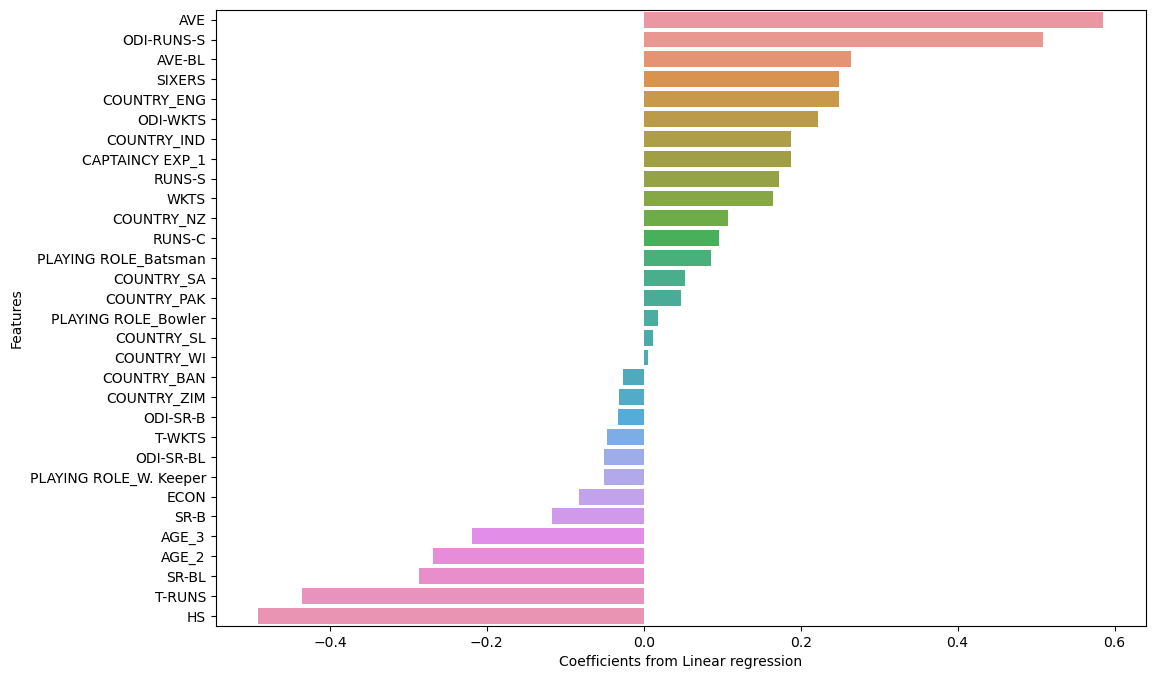

In [172]:
## Sorting the features by coefficient values in descending order
sorted_coef_vals = columns_coef_def.sort_values( 'coef', ascending=False)
plt.figure(figsize=(12,8))
sns.barplot(x= 'coef', y="columns", data = sorted_coef_vals)
plt.xlabel("Coefficients from Linear regression")
plt.ylabel("Features")
plt.show()

Few observation from this figure:
- AVE, ODI-RUNS-S, SIXERS are top three highly influential features which determine the player’s SOLD PRICE
- Higher ECON, SR-B and AGE have negative effect on SOLD PRICE.
- Interestingly, higher test runs (T-Runs) and highest score (HS) have negative effect on the SOLD
PRICE. Note that few of these counter-intuitive sign for coefficients could be due to multicollinearity.
For example, we expect SR-B (batting strike rate) to have a positive effect on the
SOLD PRICE.

**Calculating the RMSE:** We can calculate the RMSE on training and test sets to understand the model’s ability to predict SOLD PRICE.

In [173]:
from sklearn import metrics

# Takes a model as a parameter. Prints the RMSE on train and test set
def get_train_test_rmse( model ):
    # Predicting on training dataset

    y_train_pred = model.predict( X_train )
    # Compare the actual y with predicted y in the training dataset
    rmse_train = round(np.sqrt(metrics.mean_squared_error( y_train, y_train_pred)),3)

    # Predicting on test dataset
    y_test_pred = model.predict( X_test )
    # Compare the actual y with predicted y in the test dataset
    rmse_test = round(np.sqrt(metrics.mean_squared_error( y_test, y_test_pred)),3)
    print( "train: ", rmse_train, " test: ", rmse_test )

In [174]:
get_train_test_rmse(linreg)

train:  0.679  test:  0.749


RMSE on the training set is 0.679, while it is 0.749 on the test set. A good model that generalizes well
needs to have a very similar error on training and test sets. Large difference indicates that the model
may be overfitting to the training set. Most widely used approach to deal with model overfitting is called Regularization, which will be discussed in the next section.

**Applying regularization:** One way to deal with overfitting is regularization. It is observed that overfitting is typically caused by inflation of the coefficients. To avoid overfitting, the coefficients should be regulated by penalizing potential inflation of coefficients. Regularization applies penalties on parameters if they inflate to large values and keeps them from being weighted too heavily.

The coefficients are penalized by adding the coefficient terms to the cost function. If the coefficients
become large, the cost increases significantly. So, the optimizer controls the coefficient values to minimize the cost function. Following are the two approaches that can be used for adding a penalty to the cost function:
1. **L1 Norm:** Summation of the absolute value of the coeﬃcients. This is also called Least Absolute
Shrinkage and Selection Operator (**LASSO** Term) (Tibshirani, 1996). The corresponding cost function is given by: 
$$\epsilon_\text{MSE} = \frac{1}{n}\sum_{i=1}^n (y_i - (\beta_0+\beta_1 X_1+ ... + \beta_n X_n))^2 +\alpha \sum_{i=1}^n |\beta_i|$$

2. **L2 Norm:** Summation of the squared value of the coefficients. This is called **Ridge** Term (Hoerl A E and Kennard Kennard 1970). The cost function is given by:
$$\epsilon_\text{MSE} = \frac{1}{n}\sum_{i=1}^n (y_i - (\beta_0+\beta_1 X_1+ ... + \beta_n X_n))^2 +\alpha \sum_{i=1}^n (\beta_i)^2$$

Ridge term distributes (smoothens) the coefficient values across all the features, whereas LASSO seems
to reduce some of the coefficients to zero. Features with coefficients value as zero can be treated as features with no contribution to the model. So, LASSO can also be used for feature selection, that is, remove features with zero coefficients, thereby reducing the number of features.

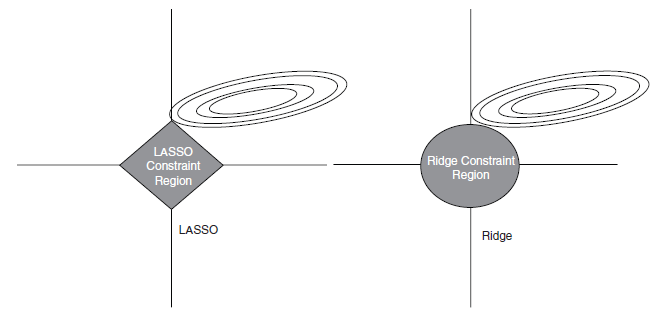

1. **Ridge Regression:** `sklearn.linear_model` provides Ridge regression for building linear models by applying L2 penalty. Ridge regression takes the following parameters:
1. `alpha` $\alpha$ – float – is the regularization strength; regularization strength must be a positive float. Regularization improves the estimation of the parameters and reduces the variance of the estimates. Larger values of alpha imply stronger regularization.
2. `max_iter` – int (integer) – is the maximum number of iterations for the gradient solver.

In [175]:
# Importing Ridge Regression
from sklearn.linear_model import Ridge
# Applying alpha = 1 and running the algorithms for maximum of 500 iterations
ridge = Ridge(alpha = 1, max_iter = 500)
ridge.fit( X_train, y_train )

Ridge(alpha=1, max_iter=500)

In [176]:
get_train_test_rmse(ridge)

train:  0.68  test:  0.724


The difference in RMSE on train and test has reduced because of penalty effect. The difference can be
reduced by applying a stronger penalty. For example, apply a value as 2.0.

In [177]:
ridge = Ridge(alpha = 2.0, max_iter = 1000)
ridge.fit( X_train, y_train )
get_train_test_rmse( ridge )

train:  0.682  test:  0.706


The difference in model accuracy on training and test has reduced. We need to calculate the optimal
value for $\alpha$. This can be achieved in many ways. Multiple values of $\alpha$ can be tested before arriving at the optimal value. The parameters which can be tuned are called hyperparameters in machine learning. Here $\alpha$ is a hyperparameter.

`sklearn.model_selection.GridSearchCV` can help search for the optimal value (will be discussed later). For now, let us assume the optimal value for a is 2.0.

2. **LASSO Regression:** `sklearn.linear_model` provides LASSO regression for building linear models by applying L1 penalty. Two key parameters for LASSO regression are:
1. `alpha` – float – multiplies the L1 term. Default value is set to 1.0.
2. `max_iter` – int – Maximum number of iterations for gradient solver.

In [178]:
#Importing LASSO Regression
from sklearn.linear_model import Lasso

# Applying alpha = 1 and running the algorithms for maximum of 500 iterations
lasso = Lasso(alpha = 0.01, max_iter = 500)
lasso.fit( X_train, y_train )

Lasso(alpha=0.01, max_iter=500)

In [179]:
get_train_test_rmse(lasso)

train:  0.688  test:  0.698


It can be noticed that the model is not overfitting and the difference between train RMSE and test RMSE
is very small. LASSO reduces some of the coefficient values to 0, which indicates that these features are not necessary for explaining the variance in the outcome variable.

We will store the feature names, coefficient values in a DataFrame and then filter the features with
zero coefficients

In [180]:
## Storing the feature names and coefficient values in the DataFrame
lasso_coef_df = pd.DataFrame( { 'columns': ipl_auction_encoded_df.columns, 'coef': lasso.coef_ } )
lasso_coef_df.head()

,columns,coef
0,T-RUNS,-0.301242
1,T-WKTS,-0.000000
2,ODI-RUNS-S,0.413059
3,ODI-SR-B,-0.000000
4,ODI-WKTS,0.157779


In [181]:
## Filtering out coefficients with zeros
lasso_coef_df[lasso_coef_df.coef == 0]

,columns,coef
1,T-WKTS,-0.0
3,ODI-SR-B,-0.0
13,AVE-BL,-0.0
28,PLAYING ROLE_Bowler,0.0


The LASSO regression indicates that the features listed under “columns” are not influencing factors for
predicting the SOLD PRICE as the respective coefficients are 0.0.

3. **Elastic Net Regression:** ElasticNet regression combines both L1 and L2 regularizations to build a regression model. The corresponding cost function is given by:

$$\epsilon_\text{MSE} = \frac{1}{n}\sum_{i=1}^n (y_i - (\beta_0+\beta_1 X_1+ ... + \beta_n X_n))^2 +\gamma \sum_{i=1}^n |\beta_i| +\sigma \sum_{i=1}^n (\beta_i)^2$$

While building ElasticNet regression model, both hyperparameters $\sigma$ (L2) and $\gamma$ (L1) need to be set. ElasticNet takes the following two parameters:
1. `alpha` - Constant that multiplies the penalty terms. Default value is set to 1.0. (alpha = $\sigma +\gamma$)
2. `l1_ratio`: The ElasticNet mixing parameter, with `0 <= l1_ratio <= 1`.
   
   $$l1\_ratio = \frac{\gamma}{\sigma+\gamma}$$

   where:
   - `l1_ration = 0` implies that the penalty is an L2 penalty
   - `l1_ratio = 1` implies that it is an L1 penalty.
   - `0 < l1_ratio < 1` implies that the penalty is a combination of L1 and L2.

**Let's take a example:** penalties applied are $\gamma =0.01$ and $\sigma =1.0$. So 

alpha =$\sigma+\gamma =1.01$ and `l1_ratio` = $\frac{\gamma}{\gamma+\sigma} =0.0099$.

In [182]:
from sklearn.linear_model import ElasticNet
enet = ElasticNet(alpha = 1.01, l1_ratio = 0.001, max_iter = 500)
enet.fit( X_train, y_train )
get_train_test_rmse( enet )

train:  0.789  test:  0.665


As we can see, applying both the regularizations did not improve the model performance. It has become
worse. In this case, we can choose to apply only L1 (LASSO) regularization, which seems to deal with the
overfitting problem efficiently.